In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error,classification_report, accuracy_score


dir='/Users/shuya/Documents/Statistical Learning/Data/'
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Question 7

7. In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500. Create a plot displaying the test
error resulting from random forests on this data set for a more comprehensive
range of values for mtry and ntree. You can model your
plot after Figure 8.10. Describe the results obtained.

In [6]:
boston=pd.read_csv(dir+'boston.csv',index_col='Unnamed: 0')
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

In [52]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(['medv'],axis=1), boston['medv'], train_size = 0.5, random_state = 0)

In [53]:
def RandomForestGridCV(features_list,trees_list,random_state,X,y,k):
    rec = np.linspace(1,X.shape[0],k,dtype=int)
    folds = [[rec[n],rec[n+1]] for n in np.arange(k-1)]
    mse_lst = []
    for feature in features_list:
        for tree in trees_list:
            mse = []
            for f in folds:
                X_test = X.iloc[f[0]:f[1]]
                X_train = X.drop(X.index[f[0]:f[1]])
                y_test = y.iloc[f[0]:f[1]]
                y_train = y.drop(y.index[f[0]:f[1]])    
                rf = RandomForestRegressor(max_features = feature, n_estimators=tree, random_state = random_state)
                rf.fit(X_train,y_train)
                pred=rf.predict(X_test)
                mse.append([feature,tree,mean_squared_error(y_test, pred)])
            avg_mse = np.mean(mse)
    mse_lst.append([feature,tree,avg_mse])    
    mse_df = pd.DataFrame(mse_lst,columns=['features','trees','mse'])
    return mse_df 

[ 5  9 13]
[ 10  14  19  24  29  34  39  44  49  54  59  64  69  74  79  84  89  94
  99 104 108 113 118 123 128 133 138 143 148 153 158 163 168 173 178 183
 188 193 198 203 207 212 217 222 227 232 237 242 247 252 257 262 267 272
 277 282 287 292 297 302 306 311 316 321 326 331 336 341 346 351 356 361
 366 371 376 381 386 391 396 401 405 410 415 420 425 430 435 440 445 450
 455 460 465 470 475 480 485 490 495 500]


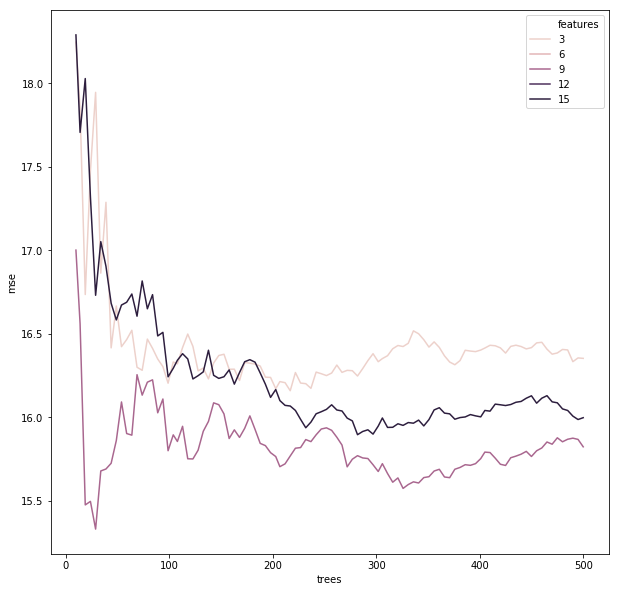

In [54]:
features_list = np.linspace(5,boston.shape[1]-1,num=3,dtype=int)
print(features_list)

trees_list = np.linspace(10,500,100,dtype=int)
print(trees_list)

mse_df = RandomForestGrid(features_list,trees_list,1,X,y,5)
#print(mse_df)
plt.figure(figsize=(10,10))
plt.xlim = 50
plt.ylim = 50
sns.lineplot(x='trees', y='mse', hue='features', 
             data=mse_df);

## Question 8

8. In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

In [15]:
carseat=pd.read_csv(dir+'Carseats.csv', index_col='Unnamed: 0')
dummies=pd.get_dummies(carseat[['ShelveLoc','Urban','US']])
carseat=pd.concat([carseat.drop(['ShelveLoc','Urban','US'],axis=1),dummies],axis=1)
print(carseat.head())
X_train,X_test,y_train,y_test=train_test_split(carseat.drop(['Sales'],axis=1),carseat['Sales'],train_size=0.8)

   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
1   9.50        138      73           11         276    120   42         17   
2  11.22        111      48           16         260     83   65         10   
3  10.06        113      35           10         269     80   59         12   
4   7.40        117     100            4         466     97   55         14   
5   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
1              1               0                 0         0          1   
2              0               1                 0         0          1   
3              0               0                 1         0          1   
4              0               0                 1         0          1   
5              1               0                 0         0          1   

   US_No  US_Yes  
1      0       1  
2      0       1  
3      0       1 

(b) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test error rate do you obtain?

In [16]:
tree_model= DecisionTreeRegressor(max_depth = 6)
tree_model.fit(X_train,y_train)

pred = tree_model.predict(X_test)
mse = mean_squared_error(pred,y_test)

print('The test error rate is {}'.format(mse))

The test error rate is 4.865505013793403


In [17]:
export_graphviz(tree_model, 
                out_file = "carseat_tree.dot", 
                feature_names = X_train.columns)

with open("carseat_tree.dot") as f:
    dot_graph = f.read()

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'carseat_tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test error
rate?

In [52]:
rec = list(np.linspace(0,carseat.shape[0],5,dtype=int))
print(rec)
cv_folds = [[rec[n],rec[n+1]] for n in range(4)]
print(cv_folds)
#carseat.drop(carseat.index[cv_folds[0][0]:cv_folds[0][1]])
np.arange(3,10)

[0, 100, 200, 300, 400]
[[0, 100], [100, 200], [200, 300], [300, 400]]


array([3, 4, 5, 6, 7, 8, 9])

In [58]:
def decisiontree_cv(X, y, fold, nodes):
    mse = []
    rec = list(np.linspace(0,X.shape[0],fold+1,dtype=int))
    folds = [[rec[n],rec[n+1]] for n in range(fold)]
    for f in folds:
        #split train and test
        X_test = X.iloc[f[0]:f[1]]
        X_train = X.drop(X.index[f[0]:f[1]])
        y_test = X.iloc[f[0]:f[1]]
        y_train = X.drop(y.index[f[0]:f[1]])
        
        #tree model
        tree_model= DecisionTreeRegressor(max_leaf_nodes = nodes)
        tree_model.fit(X_train,y_train)
        pred = tree_model.predict(X_test)        
        mse.append(mean_squared_error(y_test,pred))
    return np.average(mse)  


mse = []
for d in np.arange(3,100):
    mse.append([d,decisiontree_cv(carseat.drop(['Sales'],axis=1),carseat['Sales'], 5, d)])

mse_df=pd.DataFrame(mse,columns=['depth','mse'])

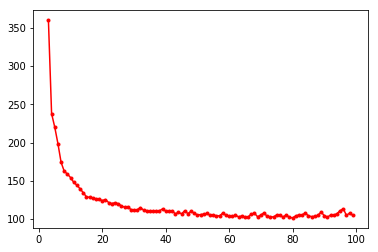

In [59]:
plt.plot(mse_df['depth'],mse_df['mse'],marker='.',color='red')

(d) Use the bagging approach in order to analyze this data. What
test error rate do you obtain? Use the importance() function to
determine which variables are most important.



reproduced the dataset, randomeforest can handle qualitative variable

In [63]:
bagged_carseat = RandomForestRegressor(max_features = carseat.shape[1]-1, random_state = 1, n_estimators=200)
bagged_carseat.fit(X_train,y_train)
Importance = pd.DataFrame({'Importance':bagged_carseat.feature_importances_*100}, 
                          index = X_train.columns)
Importance=Importance.sort_values(by='Importance',ascending=False)
print(Importance)

                  Importance
Price              27.743703
ShelveLoc_Good     24.022526
CompPrice          10.663042
Age                 9.960406
Advertising         7.824753
Income              5.682908
Population          3.817317
Education           3.231065
ShelveLoc_Bad       3.065750
ShelveLoc_Medium    2.912591
US_No               0.307548
Urban_Yes           0.287610
Urban_No            0.247241
US_Yes              0.233541


(e) Use random forests to analyze this data. What test error rate do
you obtain? Use the importance() function to determine which
variables are most important. Describe the effect of m, the number
of variables considered at each split, on the error rate
obtained.

[3.9759866223199993, 3.3409382144949986, 3.007184595764998, 2.774445624039994, 2.6563271216299973, 2.5463709058699946, 2.5040987225449953, 2.4571070948499987, 2.411203798804997, 2.4238842098749975, 2.3423544335949997, 2.327058467719997, 2.329457924314996]


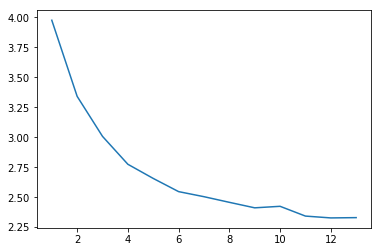

In [68]:
mse=[]
for n in range(1,carseat.shape[1]-1):    
    rf_carseat = RandomForestRegressor(max_features = n, random_state = 1, n_estimators=500)
    rf_carseat.fit(X_train,y_train)
    pred=rf_carseat.predict(X_test)
    mse.append(mean_squared_error(y_test,pred))
print(mse)
plt.plot(range(1,14),mse)

In [70]:
rf_carseat = RandomForestRegressor(max_features = 5, random_state = 1, n_estimators=200)
rf_carseat.fit(X_train,y_train)
Importance = pd.DataFrame({'Importance':rf_carseat.feature_importances_*100}, 
                          index = X_train.columns)
Importance=Importance.sort_values(by='Importance',ascending=False)
print(Importance)

                  Importance
Price              23.858393
ShelveLoc_Good     15.933295
Age                10.998336
CompPrice           8.573273
Advertising         8.294908
ShelveLoc_Bad       8.212126
Income              6.923555
Population          5.731973
ShelveLoc_Medium    4.288114
Education           4.101830
US_No               0.852449
US_Yes              0.785439
Urban_No            0.730117
Urban_Yes           0.716192


9. This problem involves the OJ data set which is part of the ISLR
package.

(a) Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

In [72]:
oj=pd.read_csv(dir+'oj.csv').drop(['Unnamed: 0'],axis=1)
oj.Store7 = oj.Store7.map({'No':0, 'Yes':1})
print(oj.head())
X_train,X_test,y_train,y_test=train_test_split(oj.drop(['Purchase'],axis=1),oj['Purchase'],train_size=800)

  Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0          0          0  0.500000         1.99         1.75       0.24   
1          0          1  0.600000         1.69         1.75      -0.06   
2          0          0  0.680000         2.09         1.69       0.40   
3          0          0  0.400000         1.69         1.69       0.00   
4          0          0  0.956535         1.69         1.69       0.00   

   Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0       0   0.000000   0.000000           0.24      1  
1   

(b) Fit a tree to the training data, with Purchase as the response
and the other variables except for Buy as predictors. Use the
summary() function to produce summary statistics about the
tree, and describe the results obtained. What is the training
error rate? How many terminal nodes does the tree have?

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

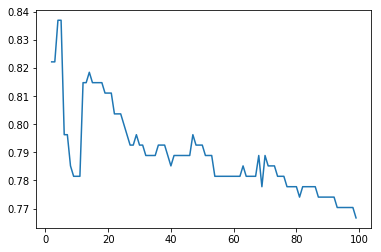

In [84]:
res=[]
for n in range(2,100):
    oj_tree = DecisionTreeClassifier(max_leaf_nodes=n,random_state=1)
    oj_tree.fit(X_train,y_train)
    pred = oj_tree.predict(X_test)
    res.append([n,accuracy_score(pred,y_test)])

res_df = pd.DataFrame(res,columns=['dep','score'])

plt.plot(res_df.dep,res_df.score)

oj_tree = DecisionTreeClassifier(max_depth=7,random_state=0)
oj_tree.fit(X_train,y_train)


(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [100]:
print(oj_tree.tree_.node_count)
print(oj_tree.classes_)
print(oj_tree.tree_.value)
oj_tree.tree_.threshold

121
['CH' 'MM']
[[[490. 310.]]

 [[ 73. 234.]]

 [[ 16. 142.]]

 [[  0.  56.]]

 [[ 16.  86.]]

 [[ 15.  86.]]

 [[  1.   0.]]

 [[ 14.  86.]]

 [[ 14.  72.]]

 [[ 11.  69.]]

 [[  3.   3.]]

 [[  0.  14.]]

 [[  1.   0.]]

 [[ 57.  92.]]

 [[ 25.  67.]]

 [[ 18.  63.]]

 [[ 14.  34.]]

 [[ 11.  33.]]

 [[  4.  23.]]

 [[  7.  10.]]

 [[  3.   1.]]

 [[  3.   0.]]

 [[  0.   1.]]

 [[  4.  29.]]

 [[  1.   1.]]

 [[  1.   0.]]

 [[  0.   1.]]

 [[  3.  28.]]

 [[  2.  27.]]

 [[  1.   1.]]

 [[  7.   4.]]

 [[  3.   0.]]

 [[  4.   4.]]

 [[  3.   4.]]

 [[  1.   0.]]

 [[  2.   4.]]

 [[  1.   0.]]

 [[ 32.  25.]]

 [[  6.   0.]]

 [[ 26.  25.]]

 [[ 19.  13.]]

 [[  3.   0.]]

 [[ 16.  13.]]

 [[  0.   1.]]

 [[ 16.  12.]]

 [[  7.  12.]]

 [[  3.   9.]]

 [[  3.   6.]]

 [[  0.   3.]]

 [[  4.   3.]]

 [[  0.   1.]]

 [[  4.   2.]]

 [[417.  76.]]

 [[141.  60.]]

 [[  7.  18.]]

 [[  2.  15.]]

 [[  1.   0.]]

 [[  1.  15.]]

 [[  0.  13.]]

 [[  1.   2.]]

 [[  1.   0.]]

 [[  0. 

array([ 4.82850000e-01,  2.64232501e-01,  3.50470003e-02, -2.00000000e+00,
        3.50000000e+00,  3.74520011e-02, -2.00000000e+00,  2.73500000e+02,
        2.63500000e+02, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
       -2.00000000e+00,  2.49999993e-01,  5.00000000e-01,  2.19999999e-01,
        4.50482503e-01,  1.87500000e+00, -2.00000000e+00, -2.00000000e+00,
        2.42000000e+02, -2.00000000e+00, -2.00000000e+00,  2.79040009e-01,
        1.50000000e+00, -2.00000000e+00, -2.00000000e+00,  2.76500000e+02,
       -2.00000000e+00, -2.00000000e+00,  2.32500000e+02, -2.00000000e+00,
        3.50000000e+00,  3.37924495e-01, -2.00000000e+00, -2.00000000e+00,
       -2.00000000e+00,  3.13600004e-01, -2.00000000e+00,  1.50000000e+00,
        3.28319997e-01, -2.00000000e+00,  2.31500000e+02, -2.00000000e+00,
       -2.00000000e+00,  2.64500000e+02,  3.10000002e-01, -2.00000000e+00,
       -2.00000000e+00,  3.29611495e-01, -2.00000000e+00, -2.00000000e+00,
        7.05698997e-01, -

(d) Create a plot of the tree, and interpret the results.

In [101]:
export_graphviz(oj_tree, 
                out_file = "oj_tree.dot", 
                feature_names = X_train.columns)

with open("oj_tree.dot") as f:
    dot_graph = f.read()

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'oj_tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [102]:
pred=oj_tree.predict(X_test)
print(confusion_matrix(y_test,pred))
print(1-accuracy_score(y_test,pred))

[[143  20]
 [ 23  84]]
0.1592592592592592


(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.
(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
(h) Which tree size corresponds to the lowest cross-validated classification
error rate?
(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.
(j) Compare the training error rates between the pruned and unpruned
trees. Which is higher?
(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [103]:
# as in (b)

## Question 10

We now use boosting to predict Salary in the Hitters data set.We now use boosting to predict Salary in the Hitters data set.

(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries

In [89]:
hitters=pd.read_csv(dir+'Hitters.csv')
hitters=hitters[hitters['Salary'].isnull()==False]
hitters['log_salary']=np.log(hitters['Salary'])
dummies=pd.get_dummies(hitters[['League','Division','NewLeague']])
hitters=pd.concat([hitters.drop(['League','Division','NewLeague'],axis=1),dummies],axis=1)
hitters=hitters.drop(['Unnamed: 0','Salary'],axis=1)
hitters.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1    315    81      7    24   38     39     14    3449    835      69   
2    479   130     18    66   72     76      3    1624    457      63   
3    496   141     20    65   78     37     11    5628   1575     225   
4    321    87     10    39   42     30      2     396    101      12   
5    594   169      4    74   51     35     11    4408   1133      19   

      ...       PutOuts  Assists  Errors  log_salary  League_A  League_N  \
1     ...           632       43      10    6.163315         0         1   
2     ...           880       82      14    6.173786         1         0   
3     ...           200       11       3    6.214608         0         1   
4     ...           805       40       4    4.516339         0         1   
5     ...           282      421      25    6.620073         1         0   

   Division_E  Division_W  NewLeague_A  NewLeague_N  
1           0           1            0            1  
2           0           1            1            0  
3           1           0            0            1  
4           1           0            0            1  
5           0           1            1            0  

[5 rows x 23 columns]

(b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

In [90]:
X_train,X_test,y_train,y_test = train_test_split(hitters.drop(['log_salary'],axis=1),hitters['log_salary'], train_size=200)
print(X_train.shape)
print(y_train.shape)

(200, 22)
(200,)


(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

In [91]:
from sklearn.metrics import mean_squared_error

mse=[]
lamb=np.linspace(0.03,0.2,30)
for _lambda in lamb:
    gbr_hitter=GradientBoostingRegressor(n_estimators = 1000, 
                                               learning_rate = _lambda, 
                                               max_depth = 4, 
                                               random_state = 1)
    gbr_hitter.fit(X_train,y_train)
    pred=gbr_hitter.predict(X_train)
    mse.append(mean_squared_error(y_train,pred))
print(mse)

[3.2490567139701042e-06, 5.479756424463652e-07, 1.7245196872832994e-07, 9.979439629193897e-08, 9.936190474575193e-08, 9.97221832376618e-08, 9.970431482723256e-08, 9.934447830996156e-08, 9.99113656354353e-08, 9.989504063753456e-08, 9.910338761238846e-08, 9.973551465430209e-08, 9.971115718127568e-08, 9.946576763493925e-08, 9.96985035311572e-08, 9.99397624077409e-08, 9.879414448653457e-08, 9.861030549444672e-08, 9.856445171651581e-08, 9.95240671749103e-08, 9.89430015766959e-08, 9.916956124818729e-08, 9.954137052531986e-08, 9.955074025995605e-08, 9.942594347224601e-08, 9.862178219546402e-08, 9.972392858398921e-08, 9.746181384196826e-08, 9.925537337715341e-08, 9.917663579707046e-08]


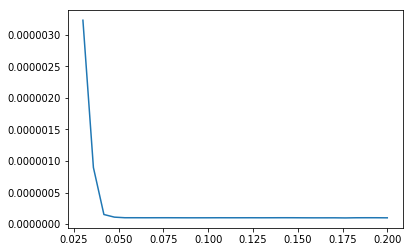

In [74]:
plt.plot(lamb,mse)

(d) Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis.

In [69]:

mse=[]
lamb=np.linspace(0.03,0.2,30)
for _lambda in lamb:
    gbr_hitter=GradientBoostingRegressor(n_estimators = 1000, 
                                               learning_rate = _lambda, 
                                               max_depth = 4, 
                                               random_state = 1)
    gbr_hitter.fit(X_train,y_train)
    pred=gbr_hitter.predict(X_test)
    mse.append(mean_squared_error(y_test,pred))
print(mse)

[0.3013648731416948, 0.29727156519590886, 0.29332748864665603, 0.2930330356209564, 0.2945187813763425, 0.3048471676380241, 0.2936746083802942, 0.30228044819011707, 0.3013084807878419, 0.3228509328191263, 0.30150766323149913, 0.2794181884831471, 0.28842709965249796, 0.31279341435484465, 0.32202039547963335, 0.27992818964097693, 0.3016995585978029, 0.3167571130458346, 0.324443261257602, 0.3147619446451434, 0.3086803605559493, 0.3070665122144833, 0.3103512296548274, 0.28690791244113767, 0.2936674870043166, 0.30057764509535617, 0.2853892172586894, 0.2829642296210049, 0.3393563360289577, 0.3146814584204317]


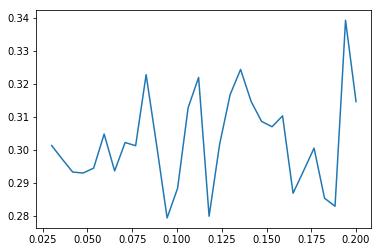

In [71]:
plt.plot(lamb,mse)

(e) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.

In [93]:
#ch 3
model = sm.OLS(y_train,X_train).fit()
pred = model.predict(X_test)
mean_squared_error(pred, y_test)

0.49850002591688225

(f) Which variables appear to be the most important predictors in
the boosted model?

In [76]:
Importance = pd.DataFrame({'Importance':gbr_hitter.feature_importances_*100}, 
                          index = X_train.columns)
Importance=Importance.sort_values(by='Importance',ascending=False)
print(Importance)

             Importance
CAtBat        50.029111
CHits          8.420037
CWalks         7.655723
CHmRun         5.301137
CRBI           4.482180
Walks          4.413345
Hits           4.259674
CRuns          3.529933
Runs           3.003852
AtBat          2.058856
PutOuts        1.810706
Years          1.133246
HmRun          1.008782
RBI            0.963385
Errors         0.734050
Assists        0.556704
NewLeague_A    0.272928
Division_W     0.176688
NewLeague_N    0.082438
League_N       0.079612
Division_E     0.022108
League_A       0.005505


(g) Now apply bagging to the training set. What is the test set MSE
for this approach?

In [99]:
rf_hitters = RandomForestRegressor(max_features = X_train.shape[1]-1, random_state = 1, n_estimators=500)
rf_hitters.fit(X_train,y_train)
mean_squared_error(rf_hitters.predict(X_test),y_test)

0.2428288991539932

## Question 11

This question uses the Caravan data set.

(a) Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.

In [129]:
caravan = pd.read_csv(dir + 'caravan.csv',index_col='Unnamed: 0')
caravan.head()


MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
1       33         1        3         2         8       0       5       1   
2       37         1        2         2         8       1       4       1   
3       37         1        2         2         8       0       4       2   
4        9         1        3         3         3       2       3       2   
5       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE    ...     APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  \
1       3       7    ...            0        0        0       1        0   
2       4       6    ...            0        0        0       1        0   
3       4       3    ...            0        0        0       1        0   
4       4       5    ...            0        0        0       1        0   
5       4       7    ...            0        0        0       1        0   

   APLEZIER  AFIETS  AINBOED  ABYSTAND  Purchase  
1         0       0        0         0        No  
2         0       0        0         0        No  
3         0       0        0         0        No  
4         0       0        0         0        No  
5         0       0        0         0        No  

[5 rows x 86 columns]

In [130]:
X_train = caravan.loc[:1001,].drop(['Purchase'],axis=1)
y_train = caravan.loc[:1001,]['Purchase']
X_test = caravan.loc[1001:,].drop(['Purchase'],axis=1)
y_test = caravan.loc[1001:,]['Purchase']

(b) Fit a boosting model to the training set with Purchase as the
response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be
the most important?

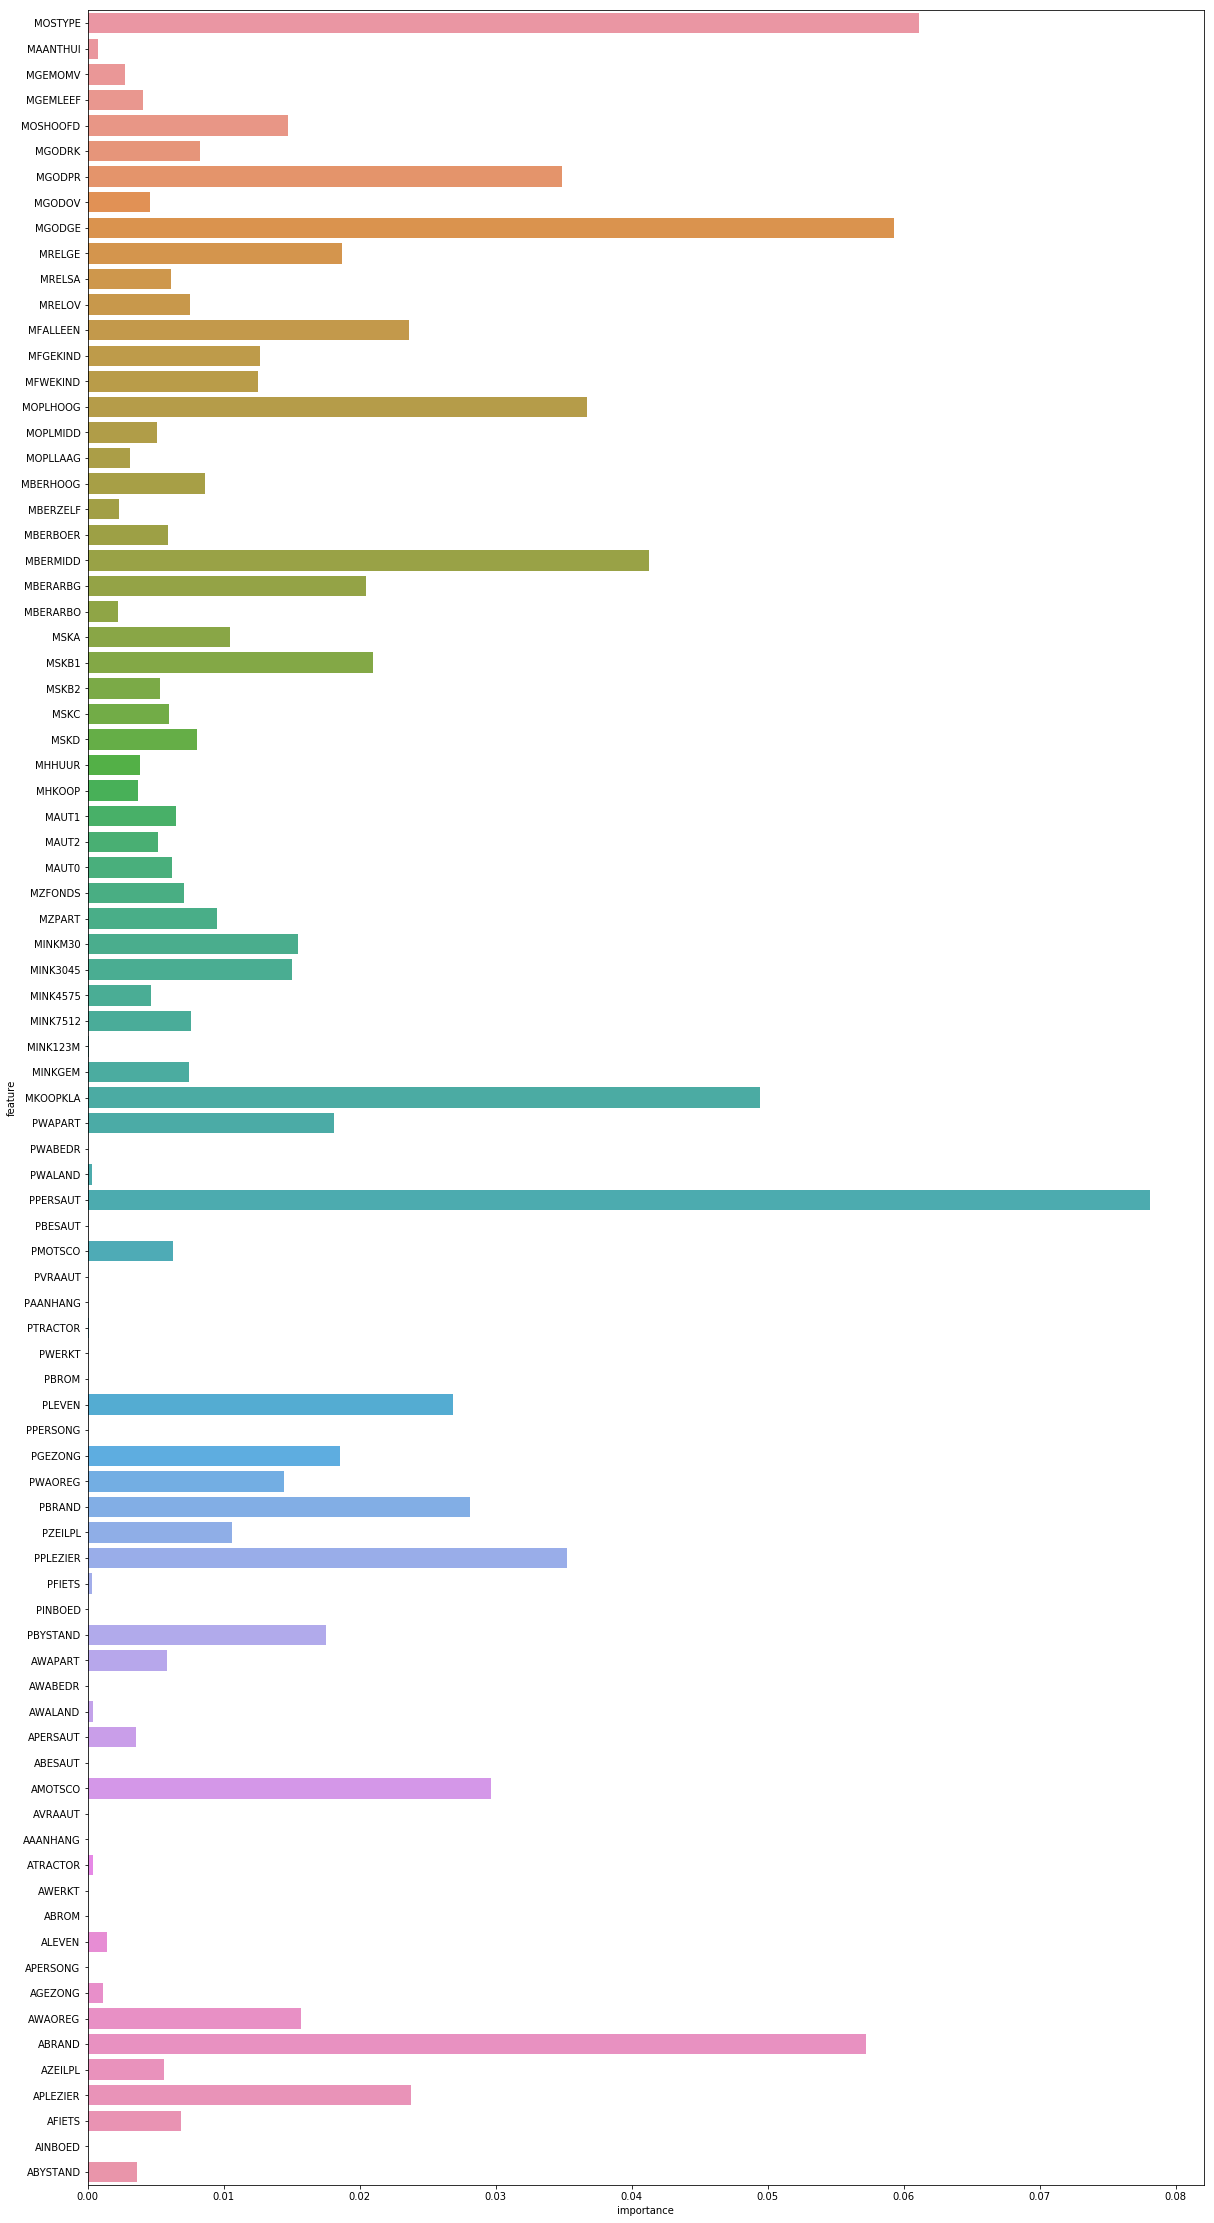

In [131]:
gbr_caravan=GradientBoostingClassifier(n_estimators = 1000, 
                                               learning_rate = 0.01, 
                                               random_state = 1)
gbr_caravan.fit(X_train,y_train)
df = pd.DataFrame({'feature': X_train.columns, 'importance': gbr_caravan.feature_importances_})
plt.figure(figsize=(20,40))
sns.barplot(x=df['importance'], y=df['feature'])

(c) Use the boosting model to predict the response on the test data.
Predict that a person will make a purchase if the estimated probability
of purchase is greater than 20%. Form a confusion matrix.
What fraction of the people predicted to make a purchase
do in fact make one? How does this compare with the results
obtained from applying KNN or logistic regression to this data
set?

In [143]:
prob = gbr_caravan.predict_proba(X_test)
pred = ['Yes' if n[0]<0.2 else 'No' for n in prob]
print(confusion_matrix(pred, y_test))
accuracy_score(pred, y_test)

[[4528  287]
 [   5    2]]


0.9394442140190792